# 自动微分
## 一个简单的例子

In [85]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [86]:
x.requires_grad_(True)
x.grad 

In [87]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

通过调用反向传播来自动计算y关于x每个分量的梯度

In [88]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [89]:
x.grad == 4 * x

tensor([True, True, True, True])

In [90]:
#默认情况下，pytorch会累积梯度，我们需要清除之前的梯度
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 分离计算

In [91]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [92]:
x.grad.zero_()
print(y.sum())
y.sum().backward()
x.grad == 2 * x

tensor(14., grad_fn=<SumBackward0>)


tensor([True, True, True, True])

## python控制流的梯度计算

In [93]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [94]:
a = torch.randn(size=(),requires_grad=True)
d = f(a)
d.backward()

In [95]:
a.grad == d / a

tensor(True)

# 练习

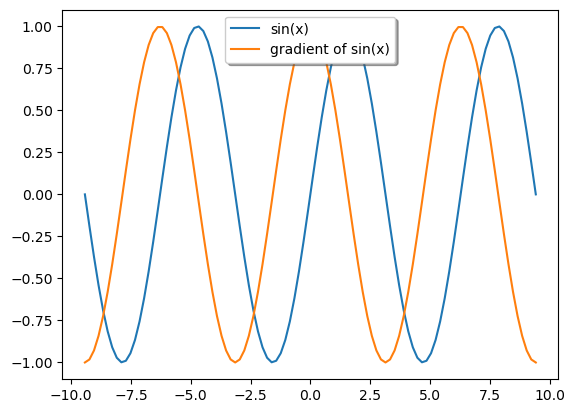

In [99]:
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter,MultipleLocator
import numpy as np
import torch

f,ax = plt.subplots(1)

x = np.linspace(-3*np.pi,3*np.pi,100)
x1 = torch.tensor(x,requires_grad=True)
y1 = torch.sin(x1)
y1.sum().backward()

ax.plot(x,np.sin(x),label='sin(x)')
ax.plot(x,x1.grad,label='gradient of sin(x)')
ax.legend(loc='upper center',shadow=True)

plt.show()
